# Predicting Heart disease

_source : https://www.kaggle.com/datasets/thedevastator/predicting-heart-disease-risk-using-clinical-var_

### Dataset overview
-------

The Heart Disease Prediction dataset on Kaggle contains information from 270 patients who have undergone cardiac catheterizations to determine whether they have heart disease or not.

There are 13 independent variables that provide insight into potential risk factors for heart disease, including age, sex, chest pain type, blood pressure measurements, cholesterol levels, electrocardiogram results, exercise-induced angina symptoms, and the number of narrowed coronary arteries seen on fluoroscopy.

A target variable indicating whether each patient has heart disease or not, is also included.

This dataset provides an opportunity to analyze how these variables interact and their potential correlation with heart disease, allowing researchers and healthcare professionals to develop preventive strategies for patients at risk and improve treatment for those with heart disease.

#### Columns with description
-------
 - Age:	The age of the patient. (Numeric)
 - Sex:	The gender of the patient. (*Categorical*)
 - Chest pain type:	The type of chest pain experienced by the patient. (*Categorical*)
 - BP:	The blood pressure level of the patient. (Numeric)
 - Cholesterol:	The cholesterol level of the patient. (Numeric)
 - FBS over 120:	The fasting blood sugar test results over 120 mg/dl. (*Categorical*)
 - EKG results:	The electrocardiogram results of the patient. (*Categorical*)
 - Max HR:	The maximum heart rate levels achieved during exercise testing. (Numeric)
 - Exercise angina:	The angina experienced during exercise testing. (*Categorical*)
 - ST depression:	The ST depression on an Electrocardiogram. (Numeric)
 - Slope of ST:	The slope of ST segment electrocardiogram readings. (*Categorical*)
 - Number of vessels fluro:	The amount vessels seen in Fluoroscopy images. (*Categorical*)
 - Thallium:	The Thallium Stress test findings. (*Categorical*)
 - Heart Disease:	Whether or not the patient has been diagnosed with Heart Disease. (*Categorical*)


#### Categorical features documentation
------

1. **Sex**
- 1 = male
- 0 = female 


2. **Chest pain type**
- Value 1: typical angina 
- Value 2: atypical angina 
- Value 3: non-anginal pain 
- Value 4: asymptomatic 

    
3. **Resting electrocardiographic results**
- Value 0: normal 
- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 

4. **FBS over 120**
- Value 1: yes
- Value 0: no
 
5. **Exercise induced angina**
- Value 1: yes 
- Value 0: no 

6. **The slope of the peak exercise ST segment**
- Value 1: upsloping 
- Value 2: flat 
- Value 3: downsloping 


7. **Number of major vessels colored by flourosopy**
- Range of values is from 1 to 3

8. **Thalium**
- Value 3: normal
- Value 6: fixed defect
- Value 7: reversable defect 


_source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease_ 

### Project objective
--------

Create a prediction model for heart disease using optimized machine learning algorithm .

Steps:

 1. _Perform feature selection to choose the most important variables for the prediction model._

 2. _Implement appropriate machine learning algorithm  and evaluate the model's performance in predicting heart disease._
 
 3. _Analysis results, future work suggestions._

### Part A. Feature Selection
------

First things first, it is important to have a solid understanding of the data on which the prediction model will be based upon. After some online research, I gathered some important relations between the features of the dataset that can prove helpful while building a robust model for heart disease prediction.

- **Age and blood pressure: Studies have found that blood pressure tends to increase with age, and that high blood pressure is more common among older individuals.**

     _source: Franklin SS, Gustin W, Wong ND, et al. Hemodynamic patterns of age-related changes in blood pressure. The Framingham Heart Study. Circulation. 1997 Apr 1;96(7):308-15. doi: 10.1161/01.cir.96.7.308. PMID: 9323043._

- **Cholesterol levels and chest pain type: One study found that patients with typical angina (a type of chest pain) had higher levels of total cholesterol and LDL cholesterol compared to patients with atypical angina or non-anginal pain.**
     
     _source: Hage FG, Szalai JP, Agrawal V, et al. Incidence of coronary artery disease in patients with atypical chest pain and normal coronary angiogram. Am J Cardiol. 2012 Jun 15;109(12):1713-7. doi: 10.1016/j.amjcard.2012.02.023. Epub 2012 Mar 29. PMID: 22463909._

- **Electrocardiogram results and number of vessels seen on fluoroscopy: A study found that patients with more severe narrowing of the coronary arteries (as seen on fluoroscopy) had a higher prevalence of abnormal ECG results.**
     
     _source: Gokhroo RK, Saxena A, Singh R, et al. Correlation between ECG and angiographic findings in coronary artery disease. Indian Heart J. 2001 May-Jun;53(3):309-13. PMID: 11766303._

- **Exercise-induced angina symptoms and blood pressure: Studies have shown that exercise-induced angina symptoms are associated with higher blood pressure and an increased risk of cardiovascular events.**
     
     _source: Kelemen MD, Effron MB. Blood pressure and the occurrence of angina pectoris during treadmill testing. Circulation. 1970 Mar;41(3):399-408. doi: 10.1161/01.cir.41.3.399. PMID: 5414611._


#### Dependencies

In [35]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

#### Reading data into a pandas dataframe

In [3]:
df = pd.read_csv("Heart_Disease_Prediction.csv")

#### Dataframe overview

In [4]:
df.head()

,index,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


Dropping the index column

In [5]:
# Drop irrelevant columns 
df.drop(columns=["index"], axis=1, inplace=True)

Renaming features in the dataframe

In [6]:
# Renaming columns in the original dataframe
df.rename(columns={"Chest pain type":"Chest_pain_type",
"FBS over 120":"FBS_over_120",
"EKG results":"EKG_results",
"Max HR":"Max_HR",
"Exercise angina":"Exercise_angina",
"ST depression":"ST_depression",
"Slope of ST":"Slope_of_ST",
"Number of vessels fluro":"Vessels_fluro",
"Heart Disease":"Heart_Disease"}, inplace=True)

In [7]:
# Checking variable types / Identifying presence of NaN entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              270 non-null    int64  
 1   Sex              270 non-null    int64  
 2   Chest_pain_type  270 non-null    int64  
 3   BP               270 non-null    int64  
 4   Cholesterol      270 non-null    int64  
 5   FBS_over_120     270 non-null    int64  
 6   EKG_results      270 non-null    int64  
 7   Max_HR           270 non-null    int64  
 8   Exercise_angina  270 non-null    int64  
 9   ST_depression    270 non-null    float64
 10  Slope_of_ST      270 non-null    int64  
 11  Vessels_fluro    270 non-null    int64  
 12  Thallium         270 non-null    int64  
 13  Heart_Disease    270 non-null    object 
dtypes: float64(1), int64(12), object(1)
memory usage: 29.7+ KB


In [84]:
# Checking for duplicate: rows
if not df.duplicated().sum():
    print("There are no duplicate entries in the dataframe.")
else:
    df.drop_duplicates(inplace=True)

There are no duplicate entries in the dataframe.


_Most of the categorical features are already transformed into numerical values, with the exception of the target feature of the dataset, that is Heart_Disease._

Basic aggregation metrics on the values of the dataframe features

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,270.0,54.433333,9.109067,29.0,48.0,55.0,61.0,77.0
Sex,270.0,0.677778,0.468195,0.0,0.0,1.0,1.0,1.0
Chest_pain_type,270.0,3.174074,0.950090,1.0,3.0,3.0,4.0,4.0
BP,270.0,131.344444,17.861608,94.0,120.0,130.0,140.0,200.0
Cholesterol,270.0,249.659259,51.686237,126.0,213.0,245.0,280.0,564.0
FBS_over_120,270.0,0.148148,0.355906,0.0,0.0,0.0,0.0,1.0
EKG_results,270.0,1.022222,0.997891,0.0,0.0,2.0,2.0,2.0
Max_HR,270.0,149.677778,23.165717,71.0,133.0,153.5,166.0,202.0
Exercise_angina,270.0,0.329630,0.470952,0.0,0.0,0.0,1.0,1.0
ST_depression,270.0,1.050000,1.145210,0.0,0.0,0.8,1.6,6.2


- There are no missing values in the dataframe.
- There are no duplicate rows in the dataframe.
- Categorical features have been encoded already (except the target variable).

Looking futher into feature values, identifying possible outliers

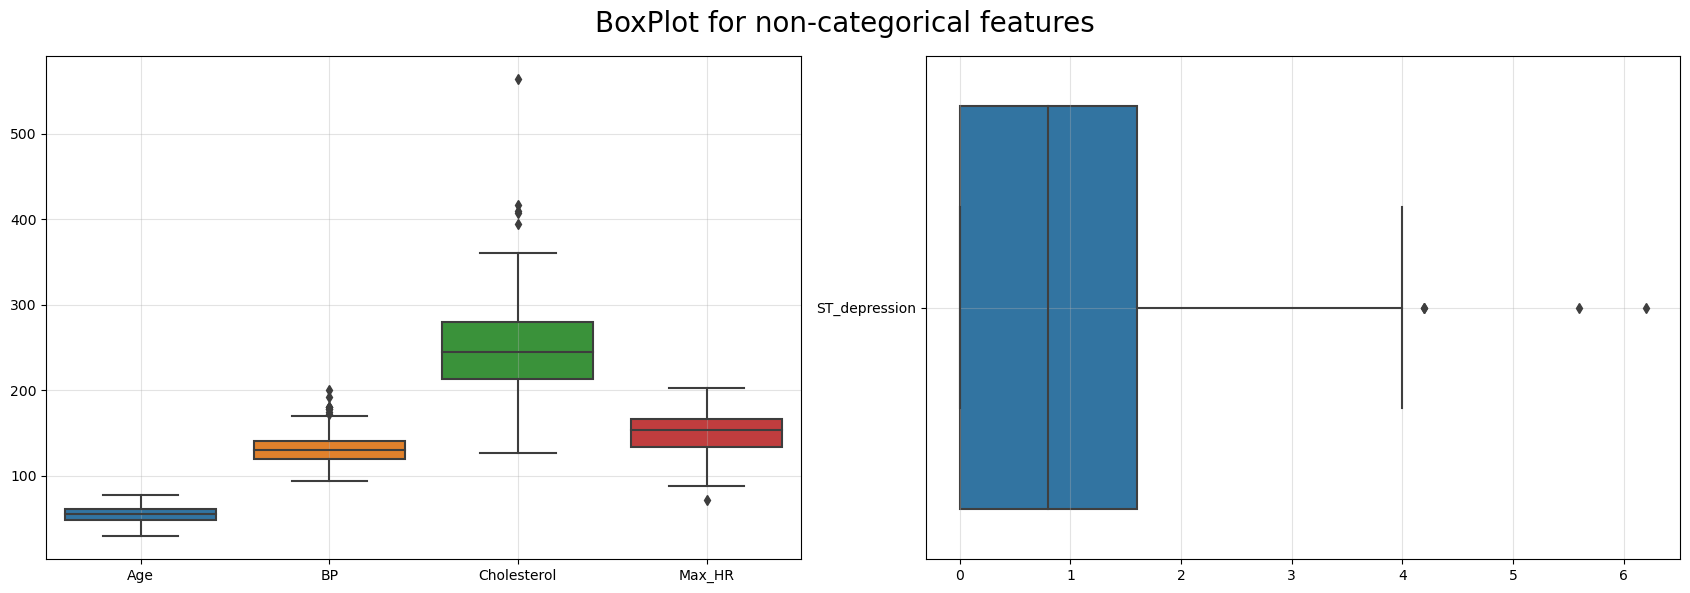

In [93]:
# Seaborn fig with two boxplots for observations (different scales)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize =[17,6], sharey=False)

plt.suptitle("BoxPlot for non-categorical features", fontsize=20)

ax1 = sns.boxplot(data=df[["Age","BP","Cholesterol","Max_HR"]], ax=ax1)
ax1.grid(alpha=0.35)

ax2 = sns.boxplot(data=df[["ST_depression"]], orient="h",ax=ax2)
ax2.grid(alpha=0.35)

plt.tight_layout()
plt.show()

Density plots for all dataframe features

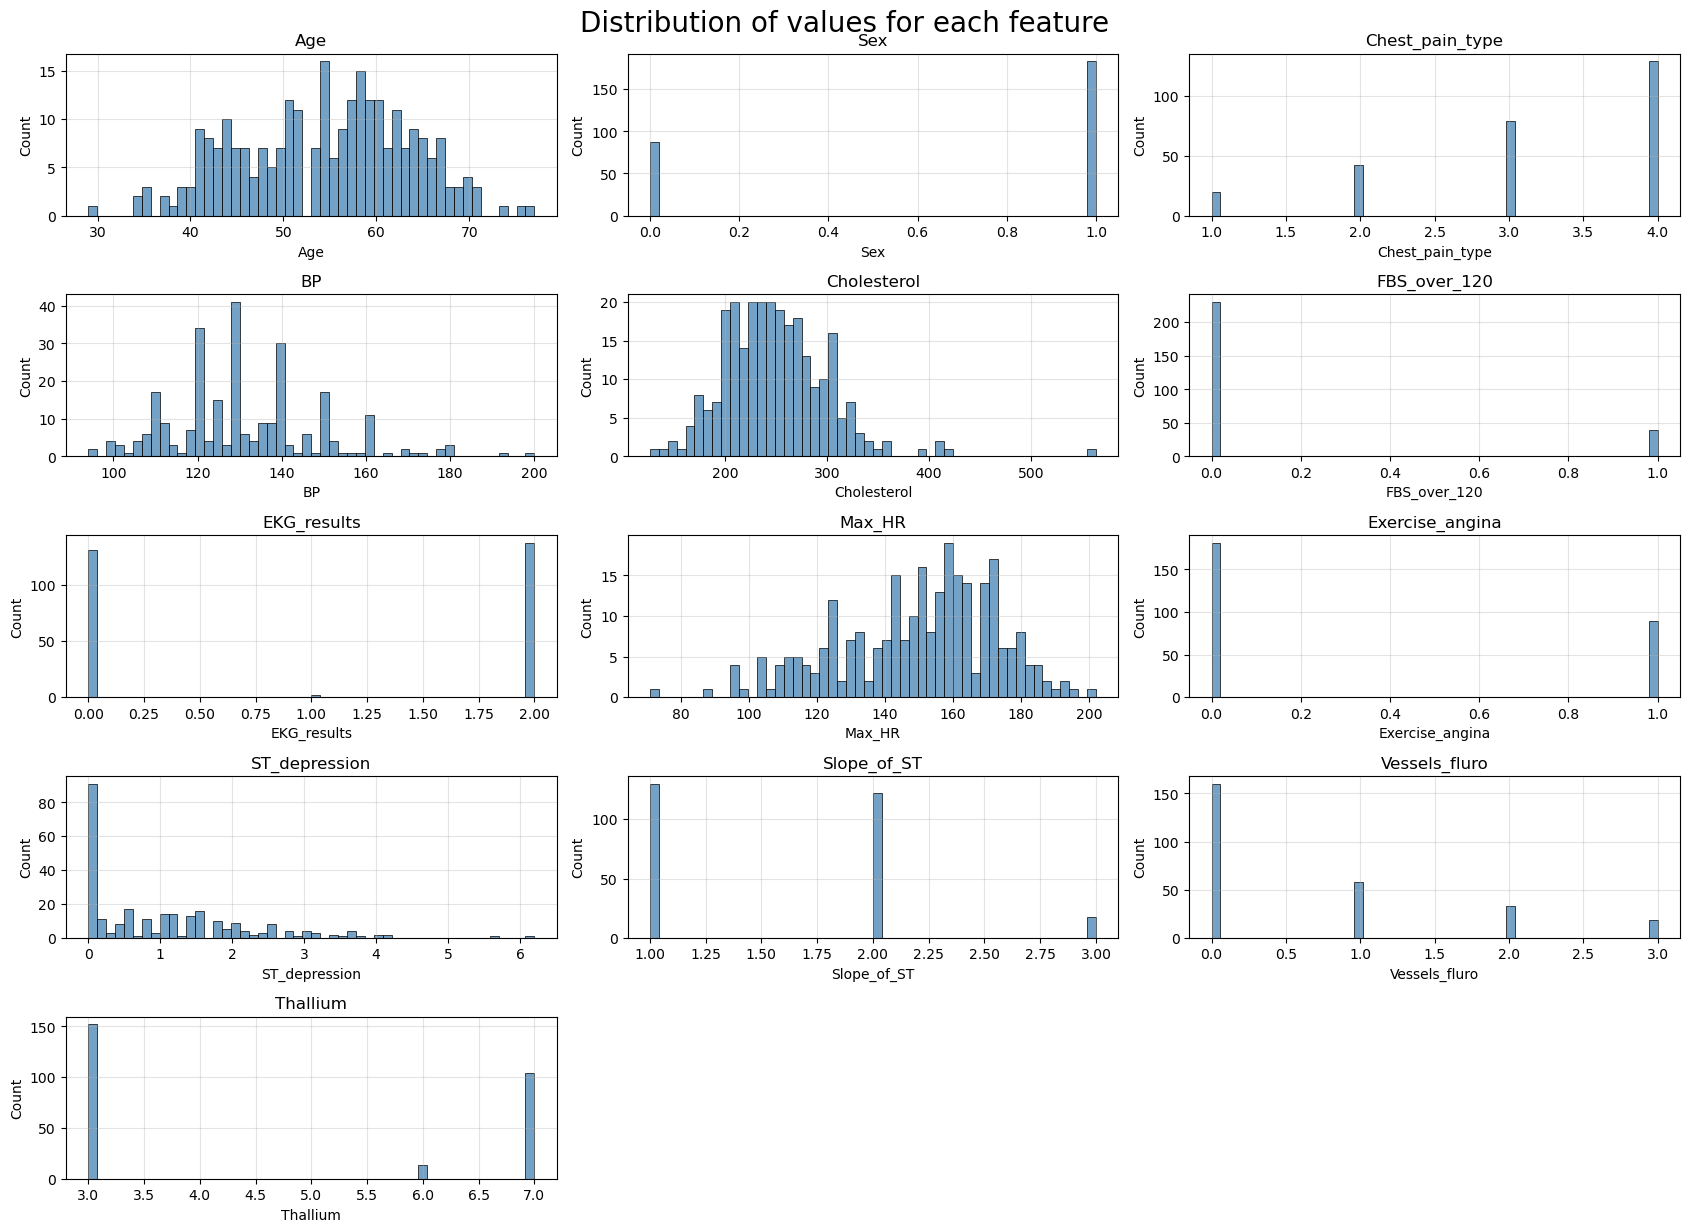

In [109]:
# Create a new dataframe with all the features except the target feature
data = df.loc[:, ~df.columns.isin(["Heart_Disease"])]

# Find the number of variables in the dataframe
num_vars =  len(data.columns)

# Calculate the number of rows and columns needed for the grid of subplots
num_rows = (num_vars // 2) + (num_vars % 2)
num_cols = 3

# Grid of subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(17, 17))

# Flatten the 2D array of axes into a 1D array
axes = axes.flatten()

# Loop through each variable and plot a density curve on a different subplot
for i, col in enumerate(data.columns):
    sns.histplot(data[col], bins=50, ax=axes[i], color="steelblue")
    axes[i].set_title(col)
    axes[i].grid(alpha=0.35)

# Remove any extra subplots from the grid
for j in range(num_vars, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.suptitle("Distribution of values for each feature", fontsize=20)
plt.tight_layout()
plt.show()


In order to examine the correlation between the multiple variables of the dataset, it should prove useful to create a correlation matrix. 

For that purpose we will be using the Spearman's rank correlation coefficient which measures the strength and direction of a monotonic relationship (which includes both linear and nonlinear relationships) between two variables. 

This tests produces a correlation coefficient that ranges from -1 to 1, where values closer to -1 indicate a negative correlation, values closer to 1 indicate a positive correlation, and values closer to 0 indicate no correlation.

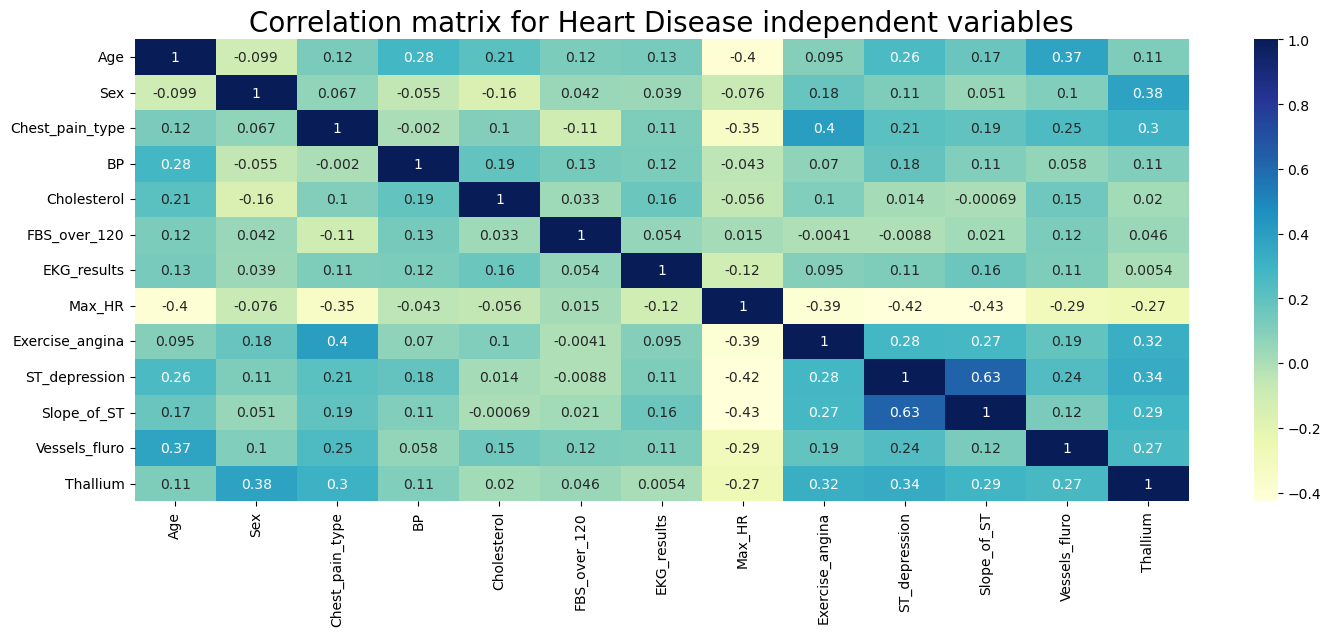

In [10]:
# Calculating the correlation matrix using the Spearman method
corr_matrix = df.corr(method="spearman")

# Plotting a heatmap with the results of the correlation matrix
plt.figure(figsize=[17,6])
sns.heatmap(data=corr_matrix, annot=True, cmap="YlGnBu")
plt.title("Correlation matrix for Heart Disease independent variables", fontsize=20)
plt.show()

It is apparent that there are correlations between the independent variables of the dataset, therefore we need a way to distinguish the ideal features to consider for our predictive model.

#### Dimension Reduction - Feature Selection

Reducing the number of features will contribute to the performance of our model in a number of ways.

- **Simplification of the Model**: Having fewer features can simplify the model and make it easier to interpret. When a model has too many features, it can be difficult to understand which features are important and how they are contributing to the model's predictions.

- **Reduction of overfitting**: When a model has too many features, it may be prone to overfitting, which occurs when the model is too complex and fits the training data too closely, leading to poor generalization on new data. By reducing the number of features, the model can be made simpler and less prone to overfitting.

- **Improved computational efficiency**: Having fewer features can improve the computational efficiency of the model, making it faster to train and use. This can be particularly important when dealing with large datasets or when the model needs to be used in real-time applications.

- **Elimination of noisy or irrelevant features**: By reducing the number of features, it is possible to eliminate features that are noisy or irrelevant to the problem at hand. This can improve the performance of the model by removing features that are not informative or that may be introducing noise into the model.

#### Choosing the appropriate Feature Selection Method

There is no single technique that is universally effective for all datasets and problems. Finding the best suited one for a given problem is often the result of good domain knowledge, (a solid understanding of the features and the type of relations that might exist among them), as well as ... lots of trial and error.

Usually plotting each feature against each other can be helpful in spotting linear relations or their absence.

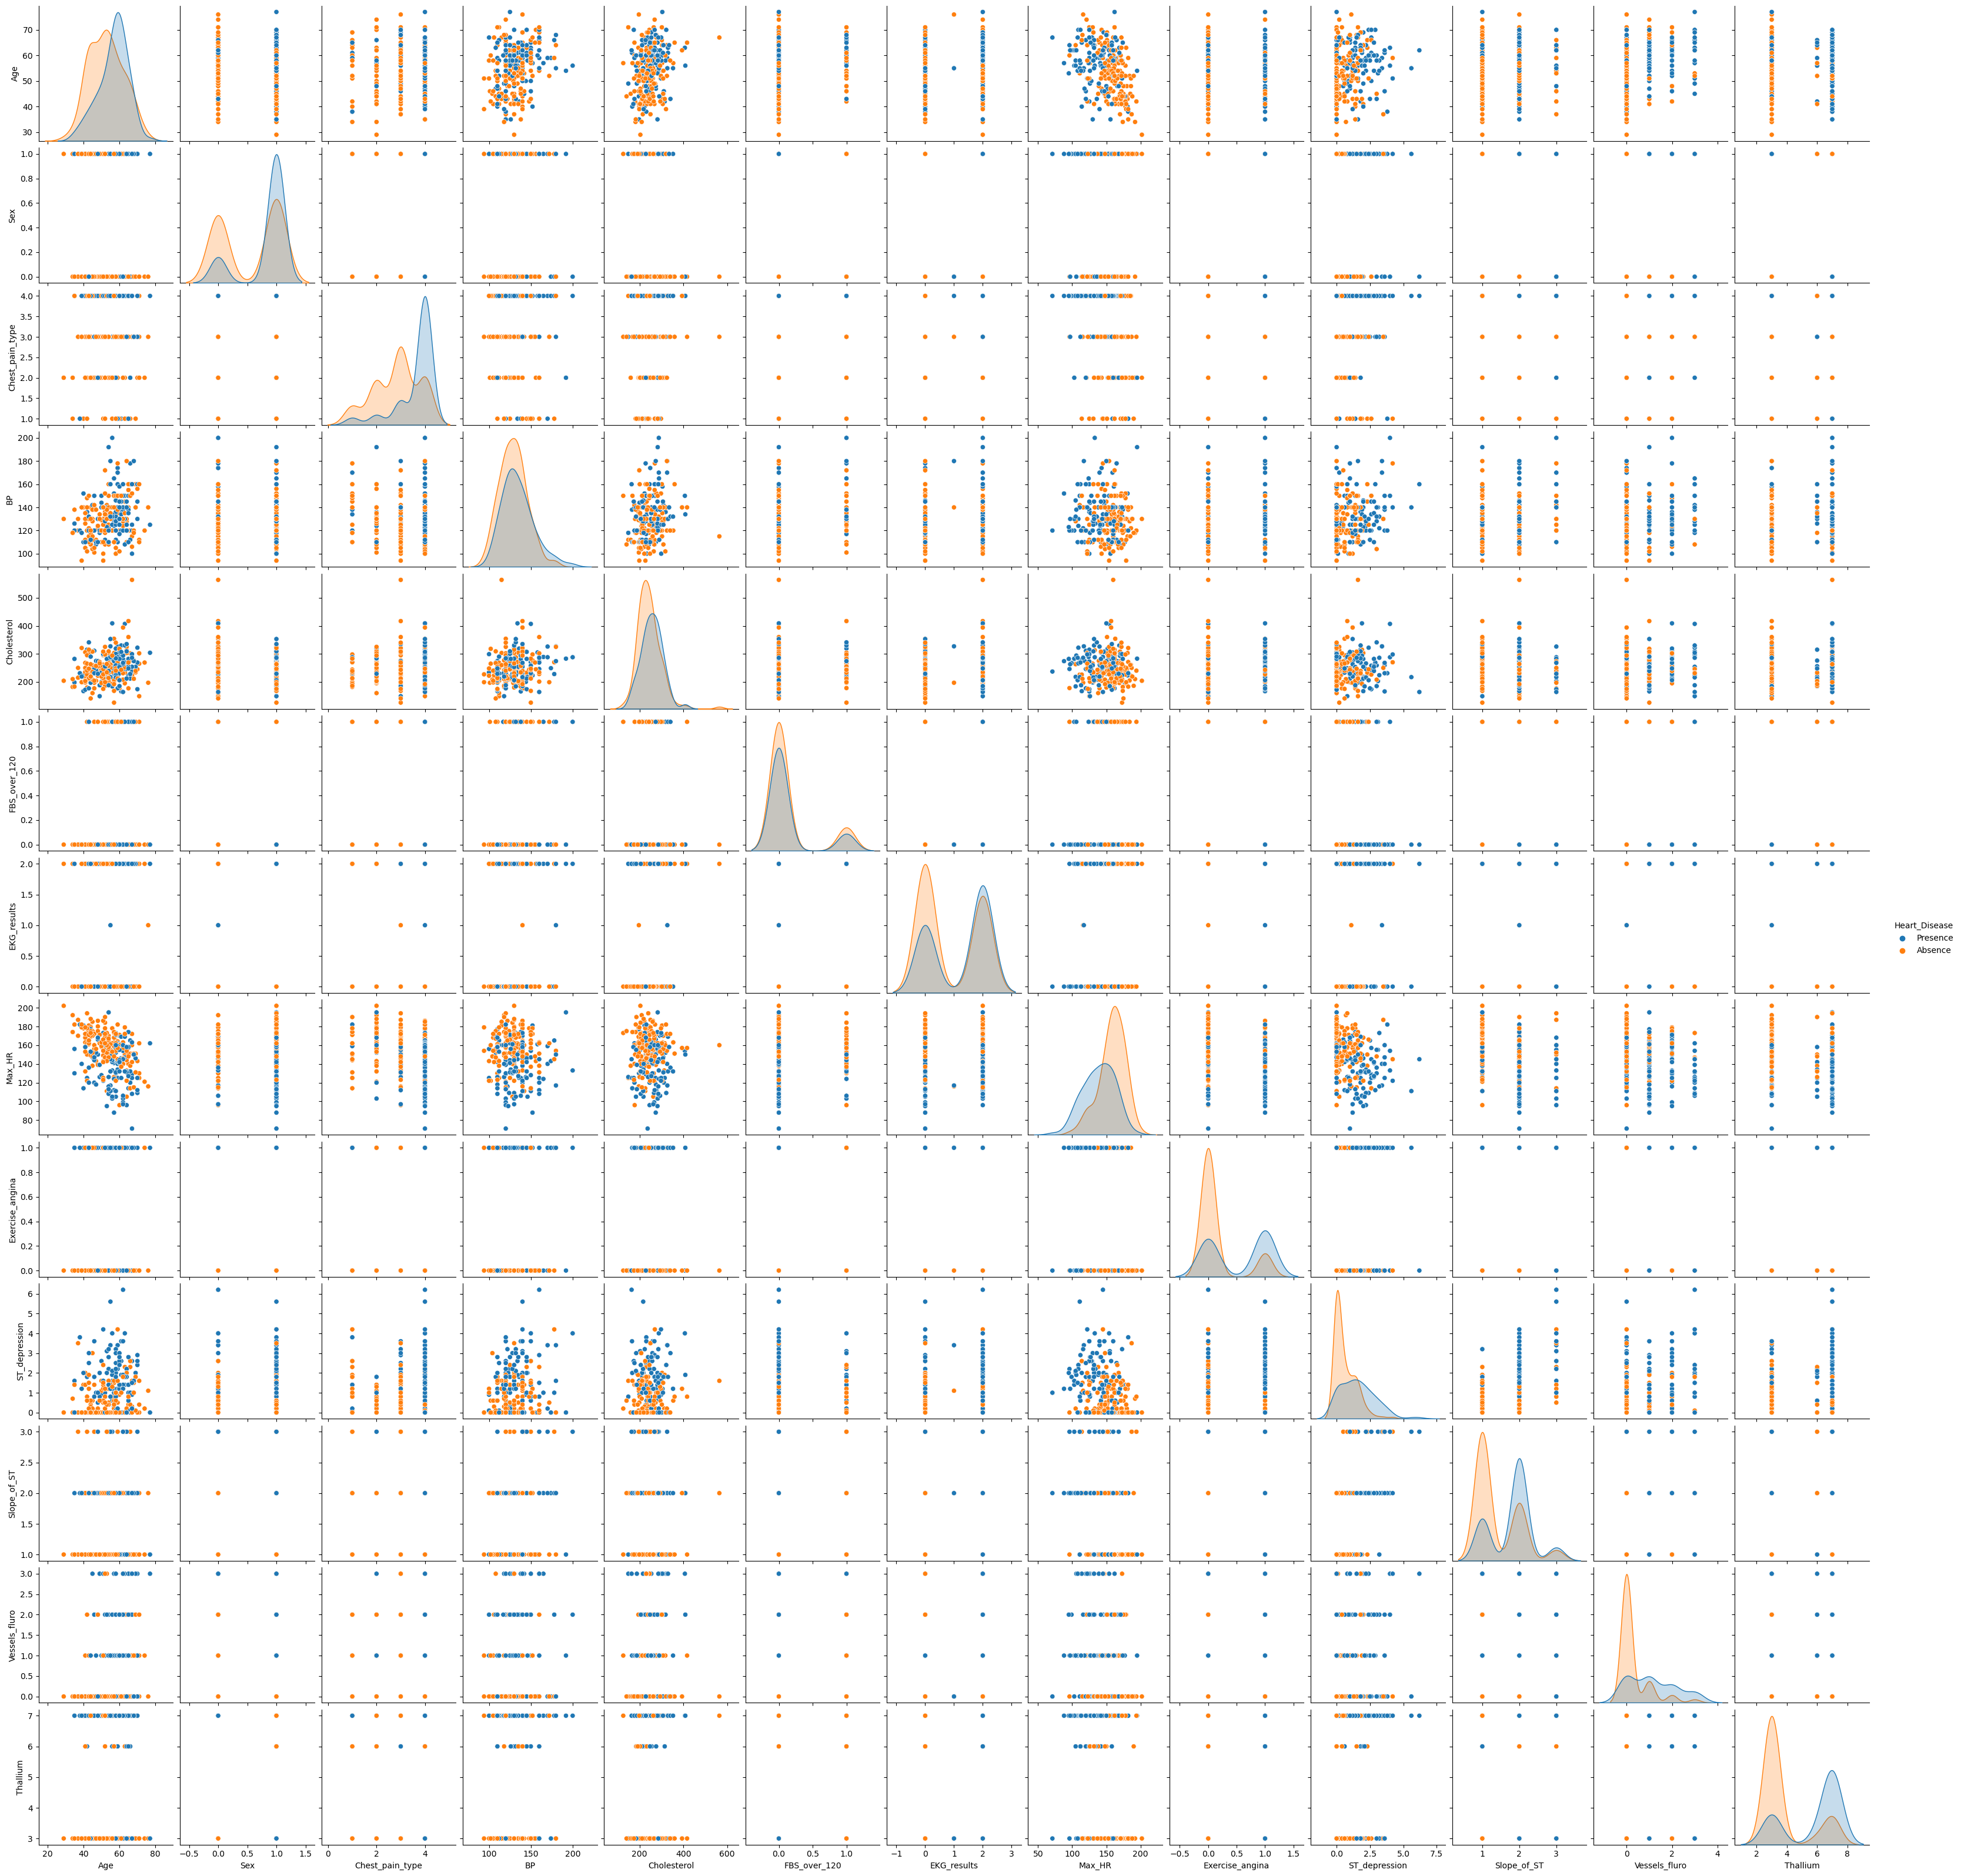

In [31]:
sns.pairplot(data=df, hue="Heart_Disease")
None

While the Spearman correlation matrix indicates that there are features who display dependency, plotting the whole dataset features as seen in the above plot doesn't point out to any strong linear relation between the independent variables.

For that reason, utilizing a feature selection method like a random forest algorithm might be more appropriate. **Random forests are particularly useful for identifying non-linear relationships and interactions between features.**

In [53]:
# Separate independent features from target feature in the dataframe
X =  df.loc[:, ~df.columns.isin(["Heart_Disease"])]
Y = df[["Heart_Disease"]]

# One-hot encode target
Y = Y.Heart_Disease.map(dict(Presence=1,Absence=0))

In [54]:
# Stratified split of the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=42)

In [57]:
# Scaling the data
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)

(189,)

In [59]:
# Instantiate a RandomForestClassifier and fit it to the training data
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [62]:
# Instantiate a SelectFromModel object, and pass the fitted RandomForestClassifier object as input to it
sfm = SelectFromModel(rfc)
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(random_state=42))

In [74]:
# Get the names of the columns for the selected features.
selected_feature_indices = sfm.get_support(indices=True)
selected_columns = df.columns[selected_feature_indices]
n_features = len(selected_columns)

print(f"Number of features:{n_features}\n Feature names:{list(selected_columns)}")

Number of features:8
 Feature names:['Age', 'Chest_pain_type', 'BP', 'Cholesterol', 'Max_HR', 'ST_depression', 'Vessels_fluro', 'Thallium']


Making a note of the features that are not selected from the Random Forest might prove useful for interpreting the results. For example the absence of the "Sex" feature might prove quite impactful for the predictions of our model. At the same time, we should take into account the relations between features such as "Age" and "Blood Pressure" that were mentioned earlier.

### Part B. Predictive Model
***

After determining the features we should consider for our model we can move on to creating the predictive model. 

For our model we will be using a SVM approach. 

Support Vector Machines (SVMs) are a popular choice for binary classification problems, such as determining the presence or absence of a disease. Here are a few reasons why SVMs can be a good choice for this type of problem:

- SVMs can handle non-linear relationships between the features: SVMs can use non-linear kernels, such as polynomial or radial basis function (RBF) kernels, to map the input features to a higher-dimensional space where the data points can be more easily separated by a hyperplane. This makes SVMs a good choice when the relationships between the features are non-linear.

- SVMs are less prone to overfitting: SVMs can be more resistant to overfitting than other algorithms, such as decision trees or k-nearest neighbors. This is because SVMs try to maximize the margin between the decision boundary and the closest data points, which can help prevent overfitting.

- SVMs can work well with high-dimensional data: SVMs can be effective in high-dimensional settings where there are many features relative to the number of data points. This is because SVMs only rely on the data points that are closest to the decision boundary (the "support vectors"), rather than using all of the data points.

